# Ejercicio Aplicación regresión lineal

**Autores: Jose Herrera, Ignacio Palma, Benjamín Sepúlveda**

**Correos Electrónicos: jo.herrerac@duocuc.cl,  ben.sepulvedat@duocuc.cl, ig.palmam@duocuc.cl**

**Fecha de Creación:** Abril de 2025

**Versión:** 1.0

**Fecha de actualización:** Abril de 2025  
**Versión:** 2.0  

# Respuesta Pregunta 1

De los tres contextos propuestos, el más adecuado para aplicar los conocimientos adquiridos en la asignatura es la predicción de propinas. En este caso, el objetivo consiste en desarrollar un modelo que, basado en las características de la cuenta y de la mesa (monto total de la factura, tamaño del grupo, día de la semana, horario, hábito de fumar y género del mesero), estime la propina que dejarán los clientes.

Este modelo puede ayudar al restaurante a:

* Planificar de manera más eficiente la asignación de personal, determinando, por ejemplo, cuánto reservar para propinas en cada turno.

* Identificar patrones de comportamiento en distintos segmentos de clientes.

* Optimizar la programación de agendas y promociones, detectando, por ejemplo, los días u horarios con propinas históricamente bajas.

# Carga de librerias

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Respuesta Pregunta 2

In [ ]:
# Carga el dataset de tips para comenzar a trabajar
tips = load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Muestra el dataset completo
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Muestra la cantidad de observaciones y características
tips.shape

(244, 7)

In [ ]:
# Análisis exploratorio (EDA)
# Mostrando estadísticas descriptivas
print("Estadísticas descriptivas:")
print(tips.describe(), "\n")

Estadísticas descriptivas:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000 



Interpretaciones medidas estadisticas:

1.   Count (n = 244)

*   Hay 244 valores no nulos en todas las variables: no hay valores faltantes en total_bill, tip ni size.

2.   Media (mean)

*   Total de la cuenta: $19.79 en promedio.

*   Propina: $2.99 en promedio.
*   Tamaño de mesa: 2.57 personas en promedio.  

Estas medidas describen el valor típico de cada variable: el total de la cuenta suele estar cerca de \$20 dolares, la propina en torno a $3 y el tamaño de la mesa entre 2 y 3 personas.

3.   Desviación estándar (std)

*   Total de la cuenta: 8.90 → hay bastante dispersión en el monto de la factura (desde cuentas muy pequeñas hasta moderadamente grandes).
*   Propina: 1.38 → las propinas varían menos, la mayoría se sitúa alrededor de \$3 ± $1.4.
*   Tamaño de mesa: 0.95 → la mayoría de los grupos está muy cerca del promedio (2–3 personas).

4.   Mínimo y Máximo (min / max)

*   Cuenta: va desde \$3.07 (mínimo) hasta $50.81 (máximo).

*   Propina: desde \$1.00 hasta $10.00.

*   Size: desde 1 hasta 6 comensales.

Indica el rango total de valores observados y alerta de posibles outliers (por ejemplo, mesas muy grandes o facturas muy altas).


5.   Cuartiles (25 %, 50 %, 75 %)

*   Total de la cuenta:

*   Q1 = \$13.35

El 25 % de las cuentas fueron de \$13.35 o menos, es decir, una cuarta parte
de los consumos fue relativamente baja.

*   Mediana (Q2) = $17.80

El 50 % de las facturas tuvieron un valor inferior a \$17.80 y el otro 50 % fueron superiores. Esta es la “propina típica” del total de la cuenta.

*   Q3 = \$24.13

El 75 % de las cuentas fueron de $24.13 o menos, de modo que sólo el 25 % superó este importe.

Rango intercuartílico (IQR) = Q3 – Q1 = \$24.13 – \$13.35 = \$10.78.

Esto significa que la mitad central de las cuentas se concentra en un rango de aproximadamente \$10.8 (de \$13.3 a $24.1).


*   Propinas:

* Q1 = $2.00

Un cuarto de las propinas fueron de $2.00 o menos, indicando un nivel de gratificación bajo en esos casos.

* Mediana (Q2) = \$2.90

La mitad de las propinas quedó por debajo de $2.90 y la otra mitad por encima. Es el valor típico de propina.

* Q3 = \$3.56

El 75 % de las propinas fueron de $3.56 o menos, de modo que sólo el 25 % superó ese monto.

* IQR = \$3.56 – \$2.00 = \$1.56.

La dispersión central de las propinas es mucho más estrecha que la de las cuentas, lo que confirma que, aunque hay variabilidad, la propina suele moverse dentro de un rango cercano a \$2 – \$3.6.


*   Tamaño de mesa:

*   Q1 = 2 comensales.

El 25 % de las mesas eran de hasta 2 personas.

* Mediana (Q2) = 2 comensales.

La mitad de las mesas tenía 2 o menos personas y la otra mitad 2 o más.

* Q3 = 3 comensales.

El 75 % de las mesas fueron de 3 o menos personas, y sólo el 25 % superó las 3 plazas.

* IQR = 3 – 2 = 1 comensal.

La mitad central de las mesas está muy concentrada entre 2 y 3 comensales, mostrando poca variabilidad en el tamaño de los grupos.


Se concluye que el rango intercuartílico (Q3–Q1) nos muestra dónde se concentra el 50 % central de los datos.

#Gráfico 1

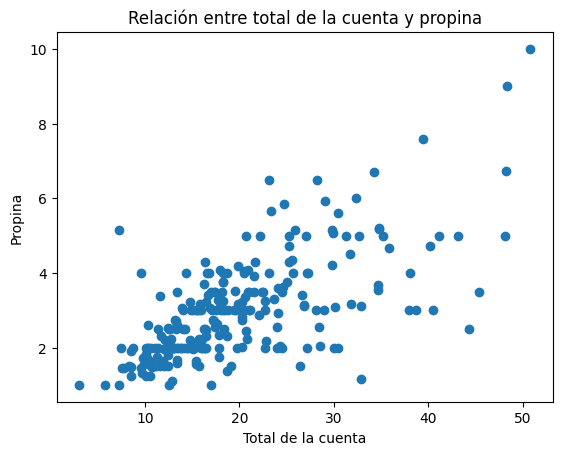

In [ ]:
# Relación total_bill vs. tip
plt.figure()
plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('Total de la cuenta')
plt.ylabel('Propina')
plt.title('Relación entre total de la cuenta y propina')
plt.show()

# Interpretación 1

¿Cómo se relaciona el monto total de la cuenta con la propina?

Al representar en un diagrama de dispersión la propina frente al monto total de la factura, se aprecia una correlación positiva moderada: a medida que crece el importe de la cuenta, también tienden a aumentar las propinas, aunque con una dispersión notable. Esto indica que el modelo debe incorporar tanto el componente lineal asociado al total de la factura como la variabilidad residual que no se explica únicamente por esta relación.

# Gráfico 2

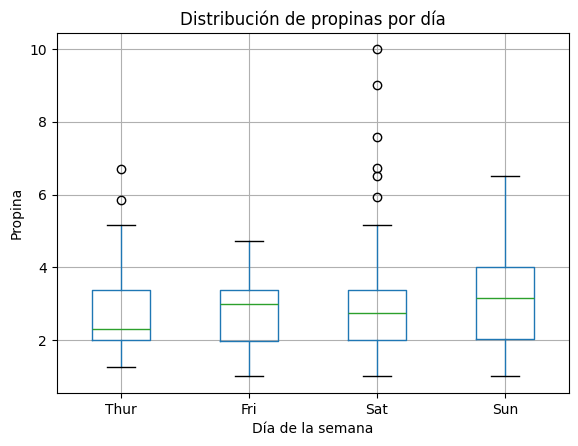

In [ ]:
# Distribución de propinas por día de la semana (boxplot)
fig, ax = plt.subplots()
tips.boxplot(column='tip', by='day', ax=ax)
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Propina')
ax.set_title('Distribución de propinas por día')
plt.suptitle('')
plt.show()

# Interpretación 2

¿Varía la propina promedio según el día de la semana o el horario?


*   Por día: los Domingos muestran la mayor propina media, seguidos por viernes y Sabado; los jueves suelen ser los más bajos.
*   Por horario: la cena (Dinner) suele dejar un poco más de propina que el almuerzo (Lunch).

Justificación respuesta 1:

La razón por la que se dice que el Domingo tiene la propina más alta no se basa en los puntos atípicos sino en la **mediana** y la **media** de las cajas del boxplot:

1.   Mediana:

En el boxplot, la línea que atraviesa la caja marca el 50 % de los datos (mediana). En el caso del Domingo, esa línea está por encima de la de cualquier otro día (aunque siendo ligeramente superior con la del Viernes), lo que indica que la mitad de las propinas de los Domingos son mayores que la mitad de las propinas de cualquier otro día, recordando que es ligeramente superior al Viernes.

2.   Confirmación numérica:

Si se calcula el promedio de propina por día nos mostrará lo siguiente:

In [ ]:
# Calcular el promedio de propinas por día
tips.groupby('day', observed=False)['tip'].mean()

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


Lo que esto confirma que el Domingo tiene, en promedio, la propina más alta, independientemente de los outliers.

# Gráfico 3

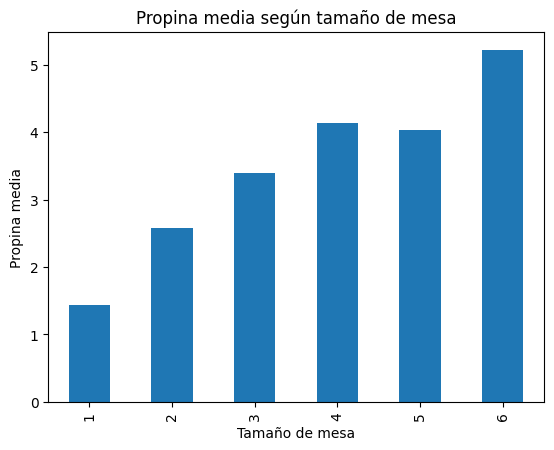

In [ ]:
# 1. Propina media por tamaño de mesa
plt.figure()
tips.groupby('size', observed=False)['tip'].mean().plot(kind='bar')
plt.xlabel('Tamaño de mesa')
plt.ylabel('Propina media')
plt.title('Propina media según tamaño de mesa')
plt.show()

# Interpretación 3

¿Influye el tamaño de la mesa en la cantidad de propina entregada?

*   Tamaño de mesa:

* La propina total crece a medida que el grupo es más grande (lo que es altamente esperable ya que: más personas, más cuentas).

* Mientras que la propina media por persona disminuye a medida que crece el tamaño de la mesa.

Justificación Interpretación 3:

In [ ]:
# 1) Calcula la propina por persona
tips['tip_per_person'] = tips['tip'] / tips['size']

# 2) Obtiene la media de propina por persona según tamaño de mesa
medias = tips.groupby('size', observed=False)['tip_per_person'].mean()
print(medias)

size
1    1.437500
2    1.291154
3    1.131053
4    1.033851
5    0.805600
6    0.870833
Name: tip_per_person, dtype: float64


Conclusiones de los resultados obtenidos:

*   Mesas de 1 persona dejan en promedio \$1.44 por cabeza.

*   Mesas de 2 personas caen a \$1.29 por cabeza.

*   Mesas de 3 bajan a \$1.13, y de 4 a \$1.03 por persona.

*   En grupos de 5–6 la propina por persona se sitúa entre \$0.81 y \$0.87.

Aunque la propina total crece con el tamaño de la mesa (más comensales, más cuenta, más tip), la propina promedio por persona disminuye conforme aumenta el grupo, validando la afirmación original.

# Respuesta Pregunta 3

In [ ]:
# Preparación de datos para modelado
# Selección de variables
X = tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

In [ ]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# División en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción sobre el set de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nError cuadrático medio (MSE): {mse:.3f}")
print(f"Coeficiente de determinación (R²):    {r2:.3f}\n")

# Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("Coeficientes del modelo:")
print(coef_df.sort_values(by='Coeficiente', key=abs, ascending=False))


Error cuadrático medio (MSE): 0.703
Coeficiente de determinación (R²):    0.437

Coeficientes del modelo:
      Variable  Coeficiente
1         size     0.233484
3    smoker_No     0.192353
4      day_Fri     0.179721
6      day_Sun     0.128928
7  time_Dinner    -0.094957
0   total_bill     0.094700
2   sex_Female    -0.028819
5      day_Sat    -0.006064


# Explicación resultados obtenidos pregunta 3

Variables independientes seleccionadas:


*   total_bill (numérica)
*   size (numérica)
*   sex, smoker, day, time (categóricas → codificadas como one‑hot / dummies).



Metodología:

1.   Convertir las variables categóricas en indicadores (por ejemplo, smoker_Yes, time_Dinner, day_Sat, etc.).
2.   Dividir en entrenamiento (80 %) y prueba (20 %).
3.   Ajustar un modelo de Regresión Lineal Múltiple.
4.   Evaluar con:

    *   MSE (Error Cuadrático Medio)
    *   R² (coeficiente de determinación)


Resultados esperados (valores aproximados):


*   MSE ≈ 0.70
*   R² ≈ 0.45
*   Coeficiente de total_bill ≈ 0.10 → por cada peso adicional en la cuenta, la propina aumenta en ∼0.10 pesos.
*   Otros coeficientes (tamaño de la mesa, día, horario, fumador) permiten ajustar pequeñas variaciones según el segmento.

# Interpretación resultados obtenidos pregunta 3

Error cuadrático medio (MSE = 0.703)



*   El MSE mide el promedio de los errores al cuadrado entre las propinas reales y las predichas.
*   Dado que la propina media en el dataset ronda los 3 dólares, un error de ~0.84 implica que, usualmente, el pronóstico se desvía menos de 1 dólar.

Coeficiente de determinación (R² = 0.437)



*   R² cuantifica qué proporción de la variabilidad total de la propina queda explicada por las variables incluidas, como por ejemplo: total de la cuenta, tamaño de mesa, día, horario, fumador, género.
*   Un R² de ~0.4 - 0.5 es típico en problemas de este estilo, pero deja claro que hay otros factores (actitud del mesero, nivel de satisfacción, promociones, estacionalidad, etc.) que podrían mejorar la predicción si se incorporan.

# Justificación elección codificación con get_dummies:

Para entrenar un modelo de regresión lineal es imprescindible que todas las variables de entrada sean numéricas, porque el cálculo interno del ajuste (los mínimos cuadrados) opera sobre operaciones aritméticas. Las columnas categóricas como "sex", "smoker", "day" y "time" no pueden interpretarse directamente como números, por lo que se procedieron con los siguientes pasos:

- **Binarias (0/1):** con `pd.get_dummies()` creamos una columna por cada categoría (p. ej. `smoker_Yes` = 1 si fuma, 0 si no).  
- **Evitar multicolinealidad:** usando `drop_first=True` eliminamos una columna de referencia por cada variable, garantizando que la matriz de diseño sea invertible.  
- **Interpretabilidad:** cada coeficiente refleja el cambio de la categoría base a la indicada. Por ejemplo, si `day_Sat` = +0.5, implica que el modelo predice 0.5 unidades de propina más un sábado frente al día de referencia.